### Μαντζαρόπουλος Κώστας

# Ε1

Αρχικά ας εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [164]:
country_scores = pd.read_excel("patel-sandefur-human-capital-final-results.xlsx", sheet_name='Country Scores')

In [165]:
country_scores.head()

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000


In [166]:
wdi = pd.read_excel('WDI_data.xlsx', na_values='..')
wdi.head()

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.016488
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,NaN
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.292517
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.199600


In [167]:
wdi_GDP = wdi[wdi['Series Code']=='NY.GDP.PCAP.PP.KD']
wdi_GDP.set_index('Country Code', inplace=True)

In [168]:
wdi_GDP = wdi_GDP.drop(columns=['Series Name','Series Code'])
wdi_GDP.head()

,Country Name,2015 [YR2015]
Country Code,,
AFG,Afghanistan,1809.016488
ALB,Albania,10971.292517
DZA,Algeria,13724.723853
ASM,American Samoa,NaN
AND,Andorra,NaN


In [169]:
wdi_GDP = wdi_GDP.rename(columns={'2015 [YR2015]':'GDP2015'})

In [170]:
wdi_GDP['GDP2015'].astype(float);

In [171]:
wdi_GDP.sort_index()

,Country Name,GDP2015
Country Code,,
ABW,Aruba,NaN
AFG,Afghanistan,1809.016488
AGO,Angola,6231.067992
ALB,Albania,10971.292517
AND,Andorra,NaN
...,...,...
XKX,Kosovo,9097.136991
YEM,"Yemen, Rep.",2641.045829
ZAF,South Africa,12362.583814


In [172]:
country_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               78 non-null     object 
 1   Country Code                                          78 non-null     object 
 2   Percent Above Math Benchmark (400 on TIMSS Scale)     70 non-null     float64
 3   Percent Above Reading Benchmark (400 on PIRLS Scale)  66 non-null     float64
 4   Median Math Score (TIMSS Scale, 4th Grade)            71 non-null     float64
 5   Median Reading Score (PIRLS Scale, 4th Grade)         68 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.8+ KB


In [173]:
country_scores_grades = country_scores.drop(columns=[country_scores.columns[2], country_scores.columns[3]])
country_scores_grades = country_scores_grades.rename(columns={country_scores.columns[4]: 'TIMSS', country_scores.columns[5]: 'PIRLS'})

In [174]:
country_scores_grades = country_scores_grades.set_index('Country Code')

In [175]:
country_scores_grades

,Country,TIMSS,PIRLS
Country Code,,,
ARE,U.A.E.,437.000000,440.000000
ARG,Argentina,406.652557,431.443542
ARM,Armenia,454.000000,NaN
AUS,Australia,520.000000,534.000000
AUT,Austria,511.000000,533.000000
...,...,...,...
TUR,Turkey,477.000000,NaN
URY,Uruguay,424.912933,450.448608
USA,United States,544.000000,560.000000


In [176]:
wdi_GDP.index

Index(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARB', 'ARG', 'ARM',
       ...
       'UZB', 'VUT', 'VEN', 'VNM', 'VIR', 'PSE', 'WLD', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='Country Code', length=264)

In [177]:
merged = country_scores_grades.merge(wdi_GDP, how='inner', left_index=True, right_index=True)

In [178]:
merged = merged.drop(columns=['Country Name'])
merged.head()

,Country,TIMSS,PIRLS,GDP2015
Country Code,,,,
ARE,U.A.E.,437.000000,440.000000,65975.375547
ARG,Argentina,406.652557,431.443542,19101.297392
ARM,Armenia,454.000000,NaN,8195.933650
AUS,Australia,520.000000,534.000000,43719.502165
AUT,Austria,511.000000,533.000000,44353.875214


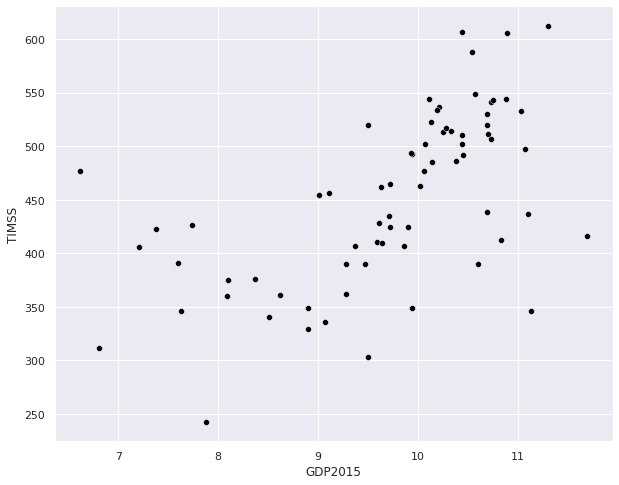

In [188]:
plt.style.use('ggplot');
sns.set(rc={'figure.figsize':(10,8)});
sns.scatterplot(x= np.log(merged['GDP2015']), y= merged['TIMSS'], color='black');

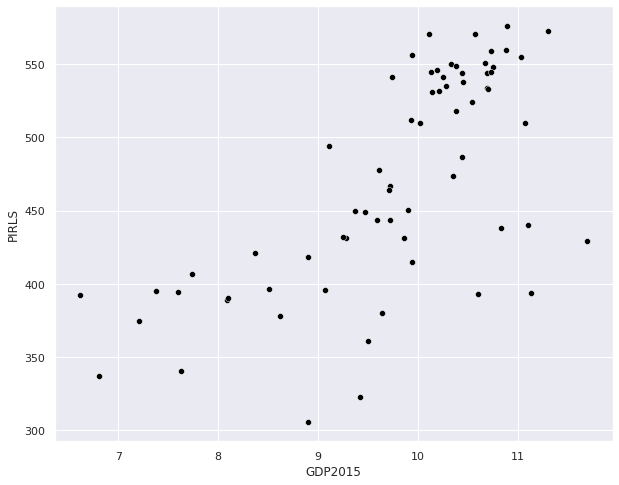

In [189]:
sns.scatterplot(x= np.log(merged['GDP2015']), y= merged['PIRLS'], color='black');